# Homework 4

## Step 1 : 
use our "titanic" dataset in homework #3, and split data in the same way you did in homework #3 - 80% as training and 20% as test sets;

In [1]:
import pandas as pd

# import data/Read in Titanic.csv
data = pd.read_csv("Titanic.csv")

# observe few samples
data

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


Take a random 80% samples for training and the rest 20% for test. 

In [2]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Step 2 : 
Fit a neural network using independent variables ‘pclass + sex + age + sibsp’ and
dependent variable ‘survived’. Fill in n/a attributes with the average of the same attributes
from other training examples. Use 2 hidden layers and set the activation functions for both the
hidden and output layer to be the sigmoid function. Set “solver” parameter as either SGD
(stochastic gradient descend) or Adam (similar to SGD but optimized performance with mini
batches). You can adjust parameter “alpha” for regularization (to control overfitting) and other
parameters such as “learning rate” and “momentum” as needed. 

In [3]:
# fill out missing features that have type of numerical values with the mean

ageMean = train_set["age"].mean()
train_set["age"].fillna(ageMean, inplace=True)

ageMean = test_set["age"].mean()
test_set["age"].fillna(ageMean, inplace=True)


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

# encode train data
le = preprocessing.LabelEncoder()
le.fit(["1st", "2nd", "3rd"])
transformedPclass = le.transform(train_set.pclass[:].values)
train_set['pclass'] = transformedPclass

le.fit(["female", "male"])
transformedSex = le.transform(train_set.sex[:].values)
train_set['sex'] = transformedSex

features = ["pclass", "sex", "age", "sibsp"]
X = train_set[features]
y = train_set["survived"]

# encode test data
le.fit(["1st", "2nd", "3rd"])
transformedPclass = le.transform(test_set.pclass[:].values)
test_set['pclass'] = transformedPclass

le.fit(["female", "male"])
transformedSex = le.transform(test_set.sex[:].values)
test_set['sex'] = transformedSex

# assign features and classes from test data
X_test = test_set[features]
y_test = test_set["survived"]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)



In [5]:
for this_alpha in ([0.0001, 0.001, 0.01, 0.1, 0.15, 1.0]):
    nnclf = MLPClassifier(hidden_layer_sizes = [100, 100],
                        solver='adam', 
                        activation = 'logistic',
                         alpha = this_alpha,
                          learning_rate = 'constant',
                          random_state = 0,
                          learning_rate_init = 0.001,
                         max_iter = 1000).fit(X_train_scaled, y)
    print('-----------------{}--------------'.format(this_alpha))
    print('Accuracy of NN classifier on training set : {:.2f}'
                              .format(nnclf.score(X_train_scaled, y)))
    print('Accuracy of NN classifier on test set : {:.2f}'
                             .format(nnclf.score(X_test_scaled, y_test)))
    print('-------------------------------------')

-----------------0.0001--------------
Accuracy of NN classifier on training set : 0.80
Accuracy of NN classifier on test set : 0.76
-------------------------------------
-----------------0.001--------------
Accuracy of NN classifier on training set : 0.80
Accuracy of NN classifier on test set : 0.76
-------------------------------------
-----------------0.01--------------
Accuracy of NN classifier on training set : 0.80
Accuracy of NN classifier on test set : 0.76
-------------------------------------
-----------------0.1--------------
Accuracy of NN classifier on training set : 0.81
Accuracy of NN classifier on test set : 0.76
-------------------------------------
-----------------0.15--------------
Accuracy of NN classifier on training set : 0.80
Accuracy of NN classifier on test set : 0.77
-------------------------------------
-----------------1.0--------------
Accuracy of NN classifier on training set : 0.64
Accuracy of NN classifier on test set : 0.55
-----------------------------

Our alpha can be as high as 0.1. Decreasing the alpha past this number does not yield improvement in accuracy, while increasing it yields a greater accuracy in predicting test set but not for training data. Therefore the best alpha lies between 0.1 and 0.15, but we will stick to 0.15 to get better results with unseen data.

In [6]:
nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], 
                      solver='adam',
                      activation = 'logistic',
                      alpha = 0.15,
                      learning_rate = 'constant',
                      random_state = 0,
                       learning_rate_init = 0.001,
                     max_iter = 1000).fit(X_train_scaled, y)

print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnclf.score(X_train_scaled, y)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnclf.score(X_test_scaled, y_test)))

Accuracy of NN classifier on training set: 0.80
Accuracy of NN classifier on test set: 0.77


## Step 3 : 
Check the performance of the model with out-of- sample accuracy, defined as
out-of-sample percent survivors correctly predicted (on test set)
out-of-sample percent fatalities correctly predicted (on test set)
Please try two different network structures (i.e., number of neurons at each hidden layer) and
show their respective accuracy. 

In [7]:
y_test_pred = nnclf.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred) # build confusion matrix

print("------------confusion matrix-------------")
print(conf_matrix)
print("-----------------------------------------")

TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]


survivorsPredictAccuracy = TP/(TP + FN)
fatalityPredictAccuracy = TN/(FP + TN) 

print("--------------------Accuracy Results (Test Data)--------------------")
print("percent of fatalities correctly predicted: {0:.2f}%".format(fatalityPredictAccuracy * 100))
print("percent of survivors correctly predicted: {0:.2f}%".format(survivorsPredictAccuracy * 100))
print("--------------------------------------------------------------------")

------------confusion matrix-------------
[[129  15]
 [ 46  72]]
-----------------------------------------
--------------------Accuracy Results (Test Data)--------------------
percent of fatalities correctly predicted: 89.58%
percent of survivors correctly predicted: 61.02%
--------------------------------------------------------------------


Trying two different network structures and measuring their accuracy

In [8]:
# Accuracy with different number of neurons at each hidden layer.
nnclf = MLPClassifier(hidden_layer_sizes = [1000, 500], 
                      solver='adam',
                      activation = 'logistic',
                      alpha = 0.15,
                      learning_rate = 'constant',
                      random_state = 0,
                       learning_rate_init = 0.001,
                     max_iter = 1000).fit(X_train_scaled, y)

print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnclf.score(X_train_scaled, y)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnclf.score(X_test_scaled, y_test)))

print('-----------------------------------------------')

# Accuracy with different solver : SGD.
nnclf = MLPClassifier(hidden_layer_sizes = [100, 100], 
                      solver='sgd',
                      activation = 'logistic',
                      alpha = 0.15,
                      learning_rate = 'constant',
                      random_state = 0,
                       learning_rate_init = 0.001,
                     max_iter = 1000).fit(X_train_scaled, y)

print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnclf.score(X_train_scaled, y)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnclf.score(X_test_scaled, y_test)))



Accuracy of NN classifier on training set: 0.79
Accuracy of NN classifier on test set: 0.76
-----------------------------------------------
Accuracy of NN classifier on training set: 0.64
Accuracy of NN classifier on test set: 0.55


Our current model outperforms these two other network structures. Our current model follows two hidden layers wtih equal sizes: [100, 100] and adam solver (the rest of the parameters remain the same across three models). The closest accuracy to our current model is the one with different number of neurons at each hidden layer. Therefore, changing the solver from adam to sgd has the biggest impact on decreasing the model's accuracy.

## Step 4: 
Compare the out-of-sample accuracy (as defined in step 3) with the random forest
obtained in homework #3. (You can either use a table or plot the results of the two algorithms
in one figure). Explain any difference in accuracy.

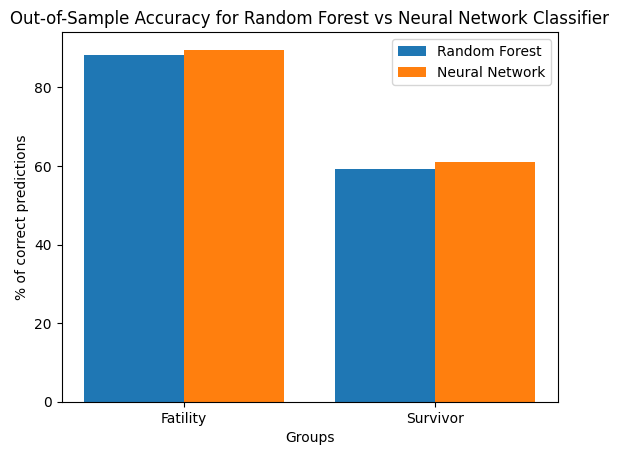

In [33]:
"""
From previous Homework 3, out-of-sample accuracy using the random forest classifier:
percent of fatalities correctly predicted: 88.19%
percent of survivors correctly predicted: 59.32%

From this model, out-of-sample accuracy using the neural network:
 [fatalityPredictAccuracy, survivorsPredictAccuracy] = [89.58%, 61.02%]
"""

import numpy as np
from matplotlib import pyplot as plt
# Simple Bar Plot
X = ['Fatility','Survivor']
RF = [88.19,59.32]
NN = [fatalityPredictAccuracy * 100,survivorsPredictAccuracy * 100]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, RF, 0.4, label = 'Random Forest')
plt.bar(X_axis + 0.2, NN, 0.4, label = 'Neural Network')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("% of correct predictions")
plt.title("Out-of-Sample Accuracy for Random Forest vs Neural Network Classifier")
plt.legend()
plt.show()
 


Neural network produced slighlty better percentages of correct predicitons for both fatality and survivor.